# [NEGATIVE BINOMIAL REGRESSION | R DATA ANALYSIS EXAMPLES](https://stats.oarc.ucla.edu/r/dae/negative-binomial-regression/)

from UCLA Statistical Methods and Data Analytics

**Examples of negative binomial regression**
- Example 1. School administrators study the **attendance behavior** of high school juniors at two schools. Predictors of the number of days of absence include the type of program in which the student is enrolled and a standardized test in math.

- Example 2. A health-related researcher is studying **the number of hospital visits** in past 12 months by senior citizens in a community based on the characteristics of the individuals and the types of health plans under which each one is covered.

**Set environment**

In [1]:
require(foreign)
require(ggplot2)
require(MASS)

Loading required package: foreign

Loading required package: ggplot2

Loading required package: MASS



## Description of the data of example 1
- 314 hight schools junior
- two urban high schools
- response variable of interest: days absent `daysabs`

In [2]:
dat <- read.dta("https://stats.idre.ucla.edu/stat/stata/dae/nb_data.dta")
dat <- within(dat, {
    prog <- factor(prog, levels = 1:3, labels = c("General", "Academic", "Vocational"))
    id <- factor(id)
})

summary(dat)

       id         gender         math          daysabs               prog    
 1001   :  1   female:160   Min.   : 1.00   Min.   : 0.000   General   : 40  
 1002   :  1   male  :154   1st Qu.:28.00   1st Qu.: 1.000   Academic  :167  
 1003   :  1                Median :48.00   Median : 4.000   Vocational:107  
 1004   :  1                Mean   :48.27   Mean   : 5.955                   
 1005   :  1                3rd Qu.:70.00   3rd Qu.: 8.000                   
 1006   :  1                Max.   :99.00   Max.   :35.000                   
 (Other):308                                                                 

## Explore the data

In [3]:
head(dat)

,id,gender,math,daysabs,prog
,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,1001,male,63,4,Academic
2,1002,male,27,4,Academic
3,1003,female,20,2,Academic
4,1004,female,16,3,Academic
5,1005,female,2,3,Academic
6,1006,female,71,13,Academic


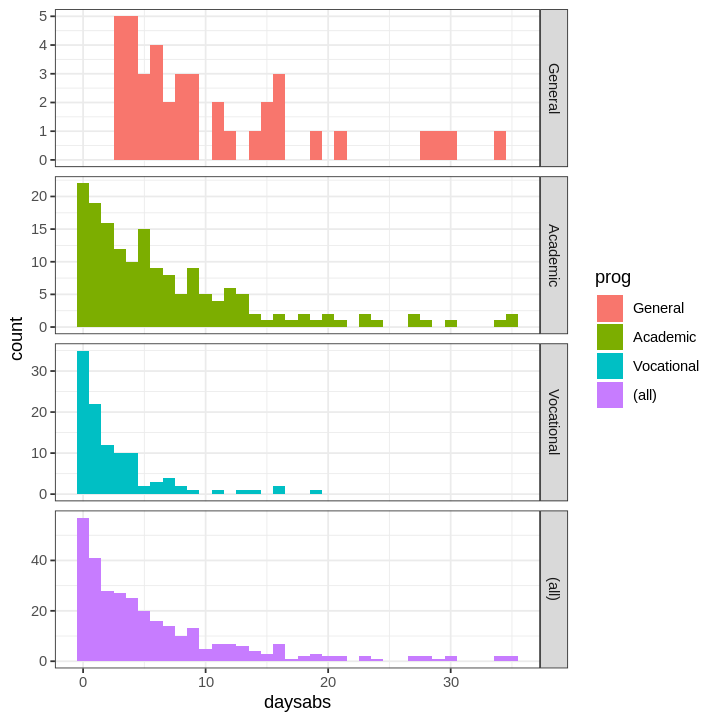

In [6]:
gpt = ggplot(dat, aes(daysabs, fill = prog)) + 
    geom_histogram(binwidth = 1) + 
    theme_bw() +
    facet_grid(
        prog ~ ., 
        margins = TRUE, 
        scales = "free")

options(repr.plot.width=6, repr.plot.height=6)
print(gpt)

In [11]:
res = with(dat, tapply(daysabs, prog, function(x) {
    sprintf("M (SD) = %1.2f (%1.2f)", mean(x), sd(x))
}))
print(res)

                General                Academic              Vocational 
"M (SD) = 10.65 (8.20)"  "M (SD) = 6.93 (7.45)"  "M (SD) = 2.67 (3.73)" 


## Analysis methods you might consider
- Negative binomial regression
- Poisson regression
- Zero-inflated regression model
    - two kinds of zeros are thought to exist
- OLS regression
    - log transfromed of count

## Negative binomial regression analysis
Below we use the glm.nb function from the MASS package to estimate a negative binomial regression.

In [13]:
summary(dat)

       id         gender         math          daysabs               prog    
 1001   :  1   female:160   Min.   : 1.00   Min.   : 0.000   General   : 40  
 1002   :  1   male  :154   1st Qu.:28.00   1st Qu.: 1.000   Academic  :167  
 1003   :  1                Median :48.00   Median : 4.000   Vocational:107  
 1004   :  1                Mean   :48.27   Mean   : 5.955                   
 1005   :  1                3rd Qu.:70.00   3rd Qu.: 8.000                   
 1006   :  1                Max.   :99.00   Max.   :35.000                   
 (Other):308                                                                 

In [12]:
m1 = glm.nb(daysabs ~ math + prog, data = dat)
summary(m1)


Call:
glm.nb(formula = daysabs ~ math + prog, data = dat, init.theta = 1.032713156, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1547  -1.0192  -0.3694   0.2285   2.5273  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     2.615265   0.197460  13.245  < 2e-16 ***
math           -0.005993   0.002505  -2.392   0.0167 *  
progAcademic   -0.440760   0.182610  -2.414   0.0158 *  
progVocational -1.278651   0.200720  -6.370 1.89e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.0327) family taken to be 1)

    Null deviance: 427.54  on 313  degrees of freedom
Residual deviance: 358.52  on 310  degrees of freedom
AIC: 1741.3

Number of Fisher Scoring iterations: 1


              Theta:  1.033 
          Std. Err.:  0.106 

 2 x log-likelihood:  -1731.258 

In [14]:
m2 = update(m1, . ~ . - prog)
summary(m2)


Call:
glm.nb(formula = daysabs ~ math, data = dat, init.theta = 0.8558564931, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0601  -1.1140  -0.3448   0.2499   2.3074  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.24663    0.13916  16.145  < 2e-16 ***
math        -0.01034    0.00259  -3.991 6.58e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.8559) family taken to be 1)

    Null deviance: 375.05  on 313  degrees of freedom
Residual deviance: 357.90  on 312  degrees of freedom
AIC: 1782.3

Number of Fisher Scoring iterations: 1


              Theta:  0.8559 
          Std. Err.:  0.0829 

 2 x log-likelihood:  -1776.3060 

In [16]:
anova(m1, m2)

Model,theta,Resid. df,2 x log-lik.,Test,df,LR stat.,Pr(Chi)
<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
math,0.8558565,312,-1776.306,,NA,NA,NA
math + prog,1.0327132,310,-1731.258,1 vs 2,2,45.04798,1.65179e-10


## Checking model assumption

In [18]:
m3 = glm(daysabs ~ math + prog, family = "poisson", data = dat)
pchisq(2 * (logLik(m1) - logLik(m3)), df = 1, lower.tail = FALSE)

'log Lik.' 2.157298e-203 (df=5)

In [19]:
(est <- cbind(Estimate = coef(m1), confint(m1)))

Waiting for profiling to be done...



,Estimate,2.5 %,97.5 %
(Intercept),2.615265446,2.24205576,3.012935926
math,-0.005992988,-0.01090086,-0.001066615
progAcademic,-0.440760012,-0.81006586,-0.092643481
progVocational,-1.278650721,-1.68348970,-0.890077623


In [20]:
exp(est)

,Estimate,2.5 %,97.5 %
(Intercept),13.6708448,9.4126616,20.3470498
math,0.9940249,0.9891583,0.9989340
progAcademic,0.6435471,0.4448288,0.9115184
progVocational,0.2784127,0.1857247,0.4106239
